In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 훌터보기


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csvPath = '/content/drive/MyDrive/Boston_house.csv'

In [ ]:
df = pd.read_csv(csvPath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [ ]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
# 이 셀의 코드는 제일 나중에 분석하자.
# 지금은 이게 중요한게 아니다.

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

## 데이터 분할

In [ ]:
# train_test_split : 사이즈의 비율을 지정하지 않으면 75:25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.2, random_state=123)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression() # 모델 객체 선언
model.fit(x_train, y_train) # 모델 학습
y_pred = model.predict(x_test) # 모델 추론(테스트)

In [ ]:
y_pred - y_test

,MEDV
410,1.003300
85,1.194474
280,-6.132305
422,-2.473864
199,-4.445125
...,...
229,-0.249167
159,3.310479
196,3.155957
345,-0.975856


In [ ]:
model.coef_

array([-9.80167937e-04,  7.22553507e-03,  4.31968412e+00, -9.87931696e-02,
       -1.36597953e+00,  6.69491841e-02, -5.43790245e-01, -1.54697747e+01,
       -9.13487599e-01,  2.84521838e-01,  4.75027102e-02, -1.27533606e-02,
        1.26954150e+00])

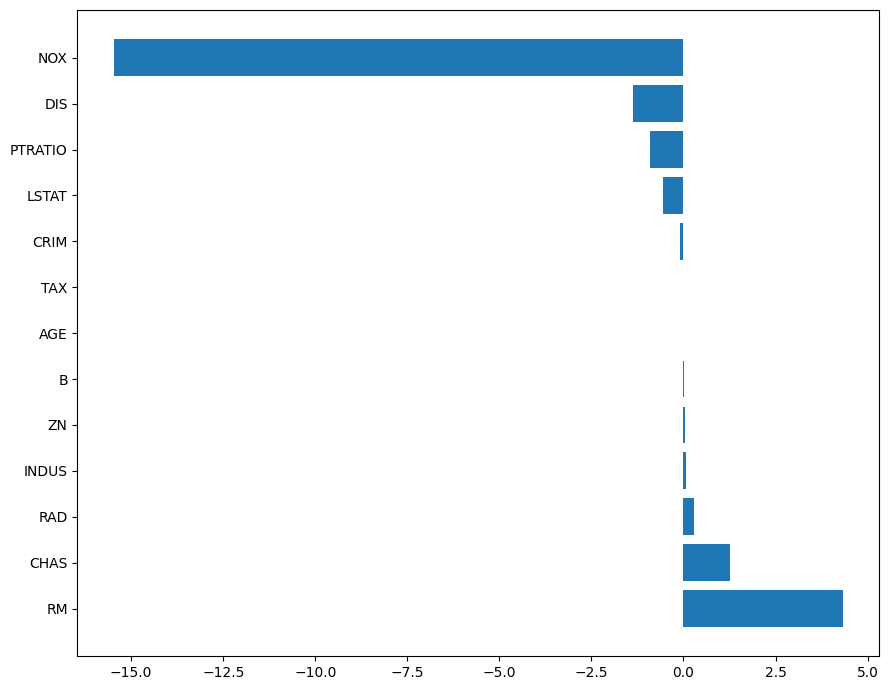

In [ ]:
plot_coef(x_train.columns, model.coef_)

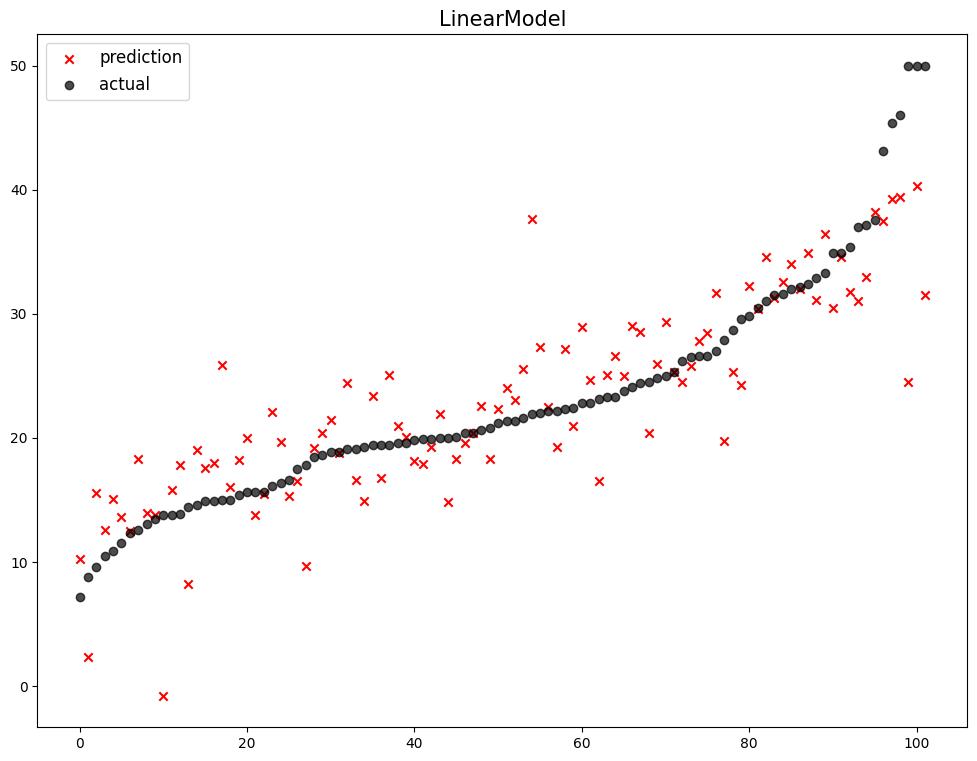

         model        mse
0  LinearModel  28.192486


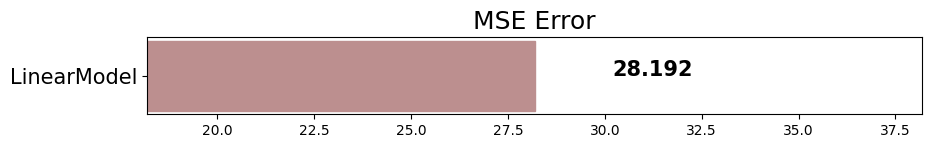

In [ ]:
mse_eval('LinearModel', y_pred, y_test)

In [ ]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.0001]
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

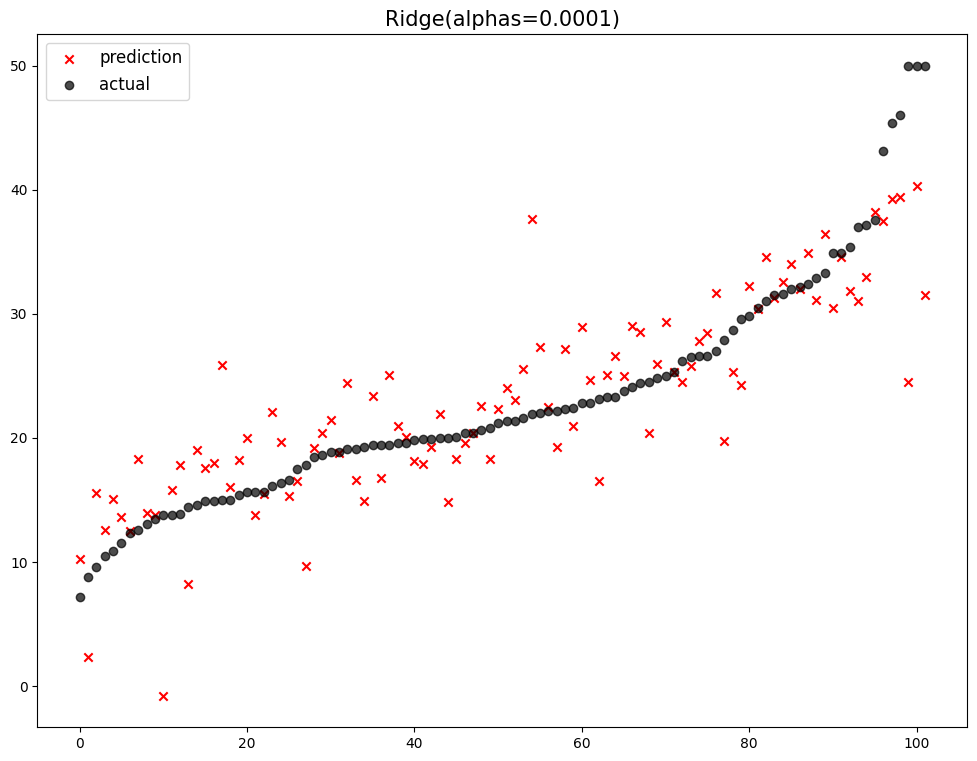

                  model        mse
0  Ridge(alphas=0.0001)  28.192594
1           LinearModel  28.192486


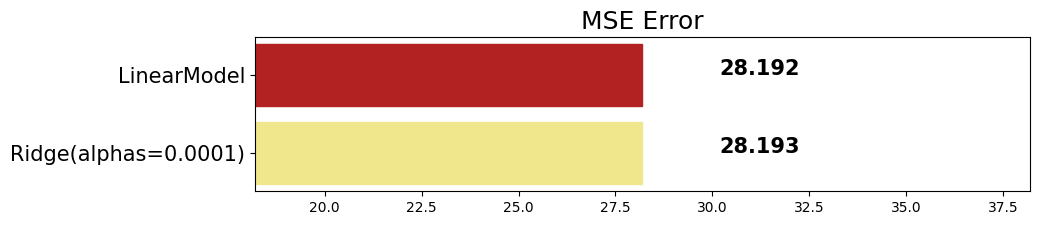

In [ ]:
mse_eval('Ridge(alphas={})'.format(alpha), y_pred, y_test)

In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.01, 0.0001]
for alpha in alphas:
    model = Lasso()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

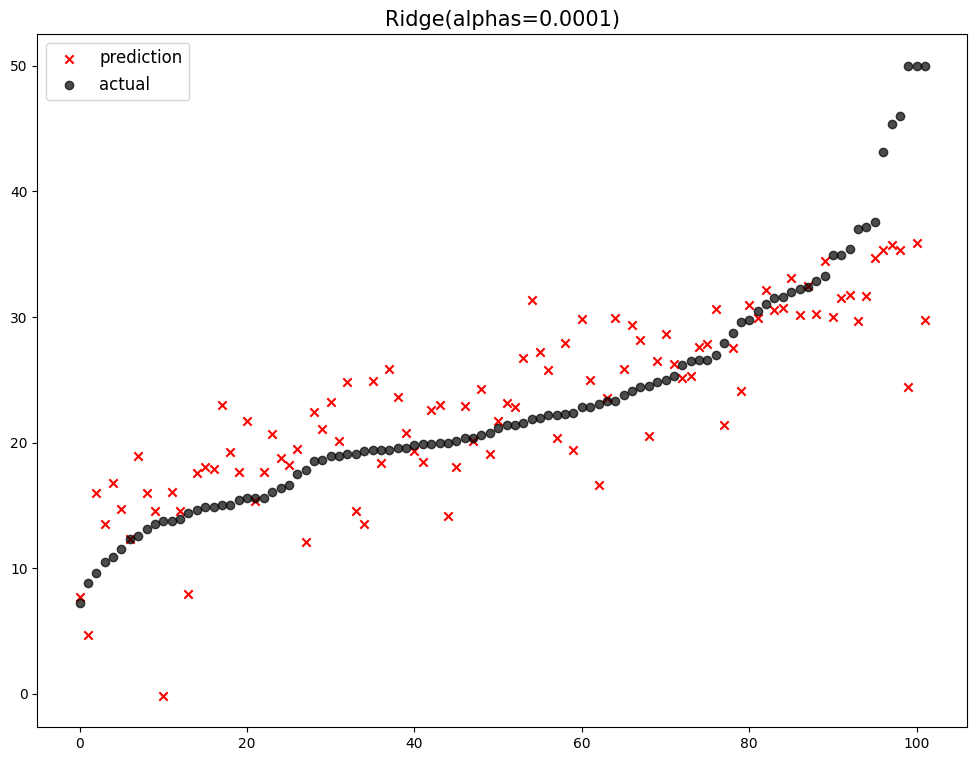

                  model        mse
0  Ridge(alphas=0.0001)  30.698782
1           LinearModel  28.192486


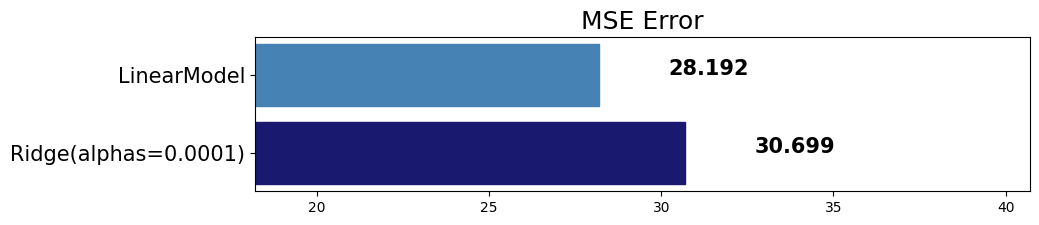

In [ ]:
mse_eval('Ridge(alphas={})'.format(alpha), y_pred, y_test)

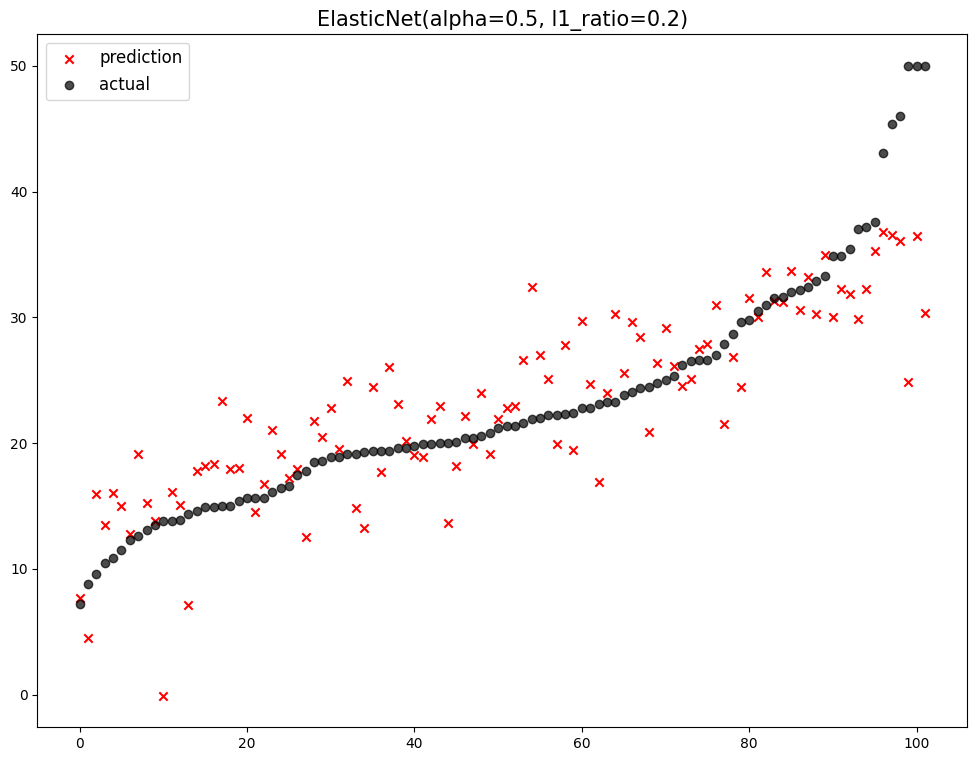

                                 model        mse
0                 Ridge(alphas=0.0001)  30.698782
1  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
2                          LinearModel  28.192486


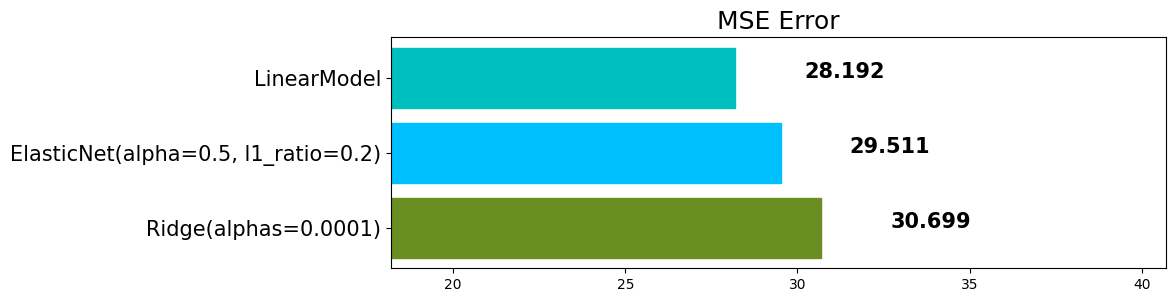

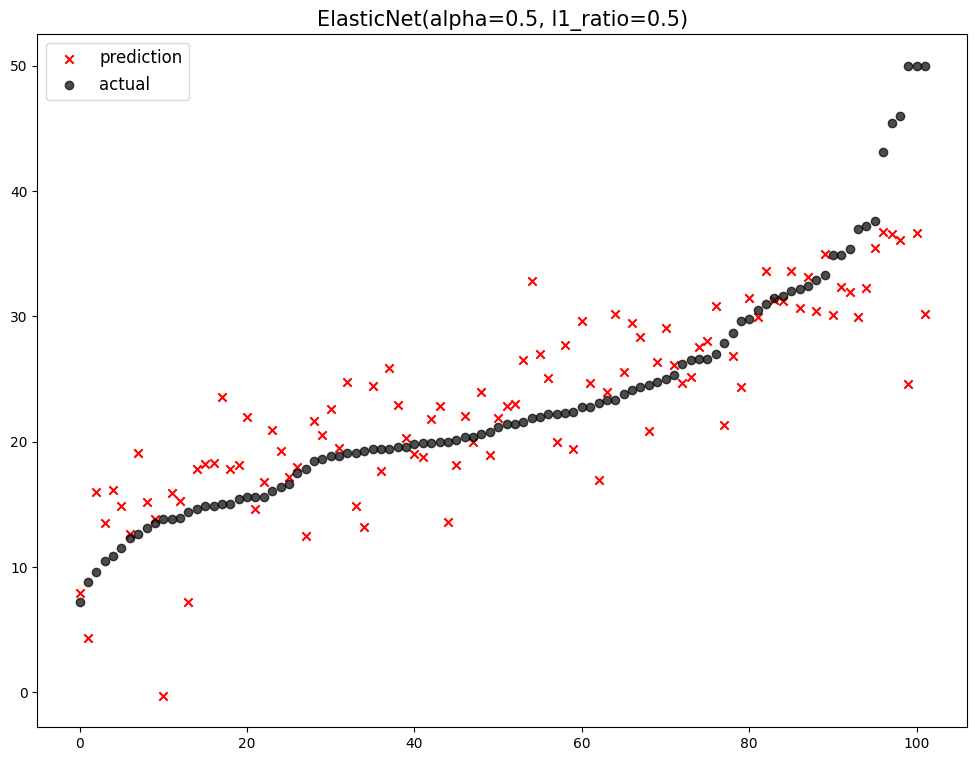

                                 model        mse
0                 Ridge(alphas=0.0001)  30.698782
1  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
2  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
3                          LinearModel  28.192486


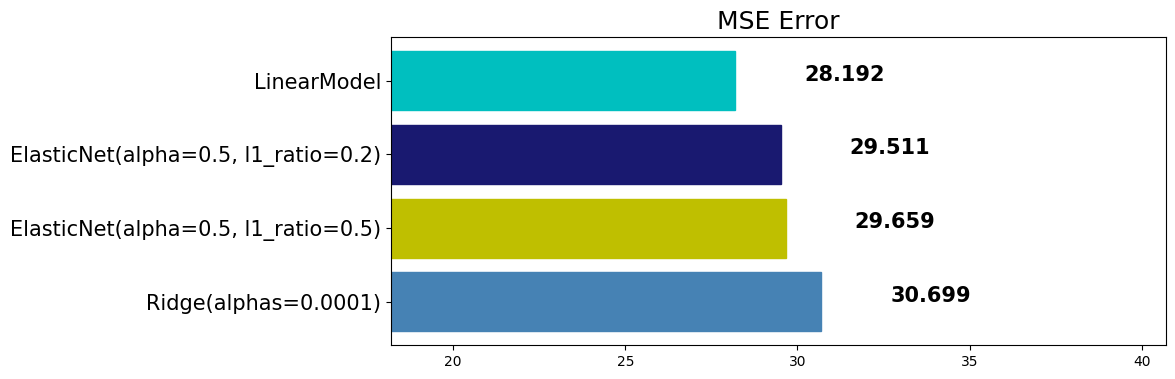

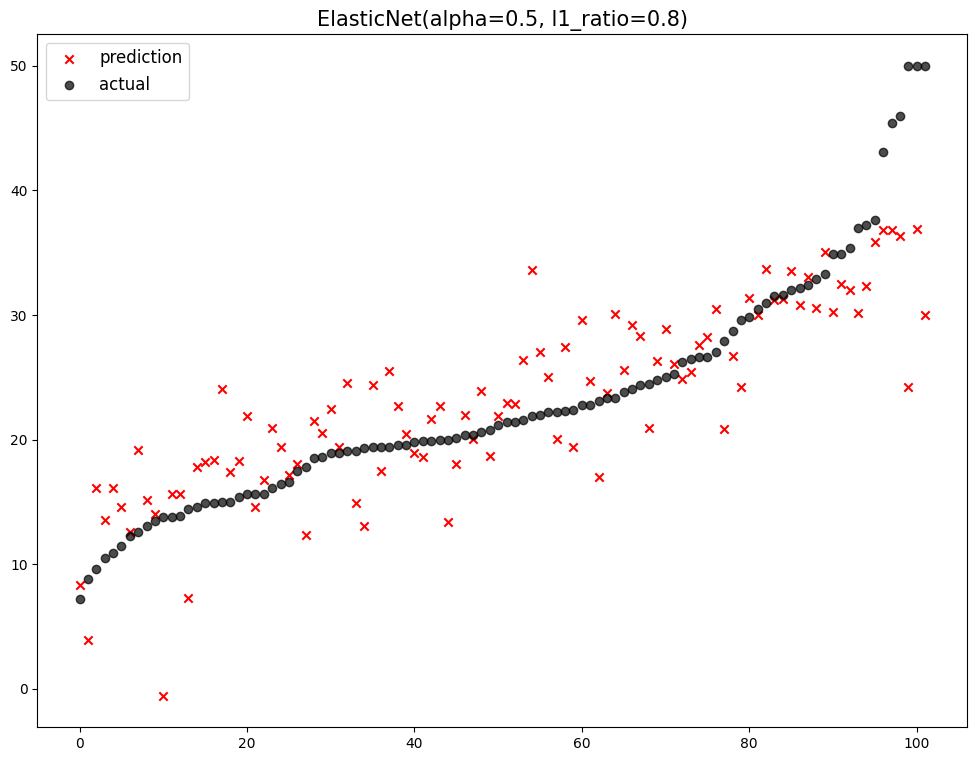

                                 model        mse
0                 Ridge(alphas=0.0001)  30.698782
1  ElasticNet(alpha=0.5, l1_ratio=0.8)  29.879814
2  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
3  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
4                          LinearModel  28.192486


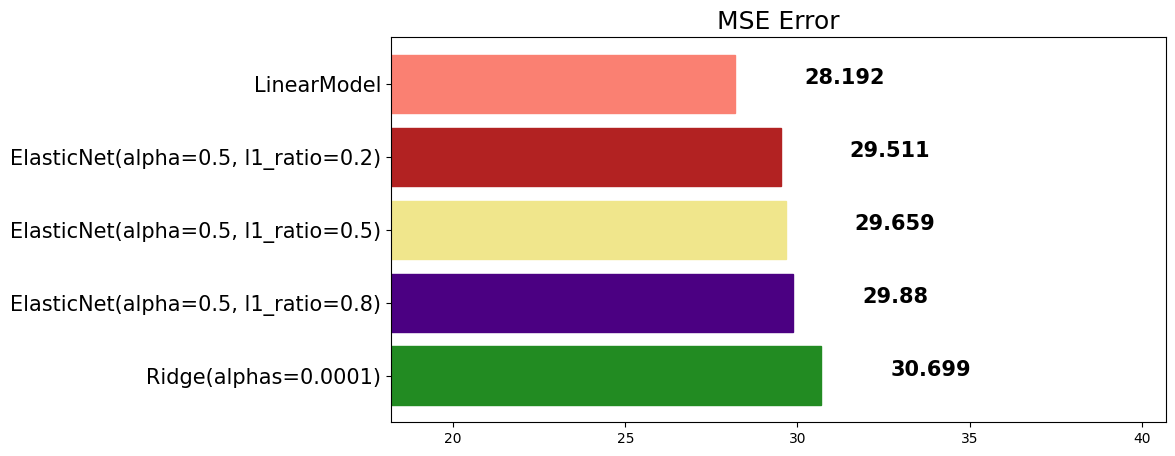

In [ ]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet

ratios = [0.2, 0.5, 0.8]
alpha = 0.5

for ratio in ratios:
    model = ElasticNet(alpha=alpha, l1_ratio=ratio)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    name = 'ElasticNet(alpha={}, l1_ratio={})'.format(alpha,ratio)
    mse_eval(name, y_pred, y_test)

In [ ]:
x_train.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,68.974505,357.209084,6.281676,3.556133,3.786204,11.190347,12.825347,0.55548,18.463861,9.509901,11.163366,408.445545,0.056931
std,28.021271,91.677481,0.704875,8.788241,2.138012,6.949621,7.127718,0.11639,2.148906,8.661394,22.973132,168.499919,0.231997
min,6.000000,0.320000,3.561000,0.006320,1.169100,0.460000,1.730000,0.38500,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.325000,376.092500,5.887750,0.081960,2.097050,5.130000,7.187500,0.45200,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.700000,391.955000,6.201500,0.252775,3.100900,9.690000,11.490000,0.53800,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.100000,396.157500,6.616500,3.681942,5.117025,18.100000,17.127500,0.62400,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.725000,88.976200,12.126500,27.740000,36.980000,0.87100,22.000000,24.000000,100.000000,711.000000,1.000000


<ipython-input-35-d2b5f9e1b43b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['AGE'])


<Axes: xlabel='AGE', ylabel='Density'>

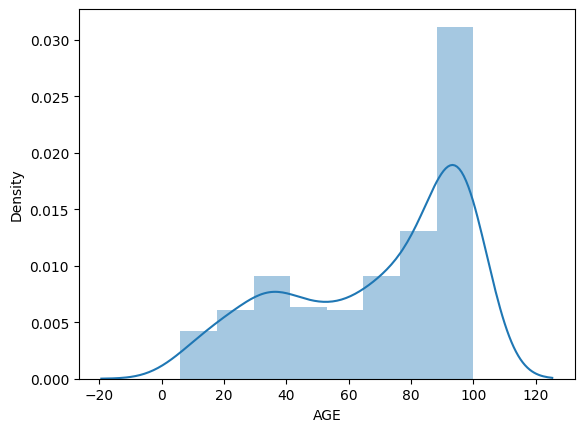

In [ ]:
sns.distplot(x_train['AGE'])

In [ ]:
# 1. standarSlcaler 객체 생성
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# 2. 데이터의 분포를 확인하고 스탠다드 스케일러 적용
std_scaled = std_scaler.fit_transform(x_train)
# 3. 소수점 2째자리에서 반올림
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.25,-3.90,-3.86,-0.40,-1.23,-1.55,-1.56,-1.47,-2.73,-0.98,-0.49,-1.32,-0.25
25%,-0.85,0.21,-0.56,-0.40,-0.79,-0.87,-0.79,-0.89,-0.50,-0.64,-0.49,-0.77,-0.25
50%,0.31,0.38,-0.11,-0.38,-0.32,-0.22,-0.19,-0.15,0.27,-0.52,-0.49,-0.47,-0.25
75%,0.90,0.43,0.48,0.01,0.62,1.00,0.60,0.59,0.81,1.68,0.06,1.53,-0.25
max,1.11,0.43,3.47,9.73,3.91,2.38,3.39,2.71,1.65,1.68,3.87,1.80,4.07


In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(x_train)
round(pd.DataFrame(mm_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.67,0.90,0.53,0.04,0.24,0.39,0.31,0.35,0.62,0.37,0.11,0.42,0.06
std,0.30,0.23,0.14,0.10,0.20,0.25,0.20,0.24,0.23,0.38,0.23,0.32,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.42,0.95,0.45,0.00,0.08,0.17,0.15,0.14,0.51,0.13,0.00,0.18,0.00
50%,0.76,0.99,0.51,0.00,0.18,0.34,0.28,0.31,0.69,0.17,0.00,0.27,0.00
75%,0.94,1.00,0.59,0.04,0.36,0.65,0.44,0.49,0.81,1.00,0.12,0.91,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# 중앙값이 0, 1되도록 반환
# robustScaler
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
rb_scaled = rb_scaler.fit_transform(x_train)
round(pd.DataFrame(rb_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.18,-1.73,0.11,0.92,0.23,0.12,0.13,0.10,-0.21,0.23,0.89,0.20,0.06
std,0.57,4.57,0.97,2.44,0.71,0.54,0.72,0.68,0.77,0.43,1.84,0.44,0.23
min,-1.47,-19.52,-3.62,-0.07,-0.64,-0.71,-0.98,-0.89,-2.30,-0.20,0.00,-0.37,0.00
25%,-0.66,-0.79,-0.43,-0.05,-0.33,-0.35,-0.43,-0.50,-0.59,-0.05,0.00,-0.13,0.00
50%,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.34,0.21,0.57,0.95,0.67,0.65,0.57,0.50,0.41,0.95,1.00,0.87,0.00
max,0.46,0.25,3.46,24.65,2.99,1.39,2.56,1.94,1.05,0.95,8.00,0.98,1.00


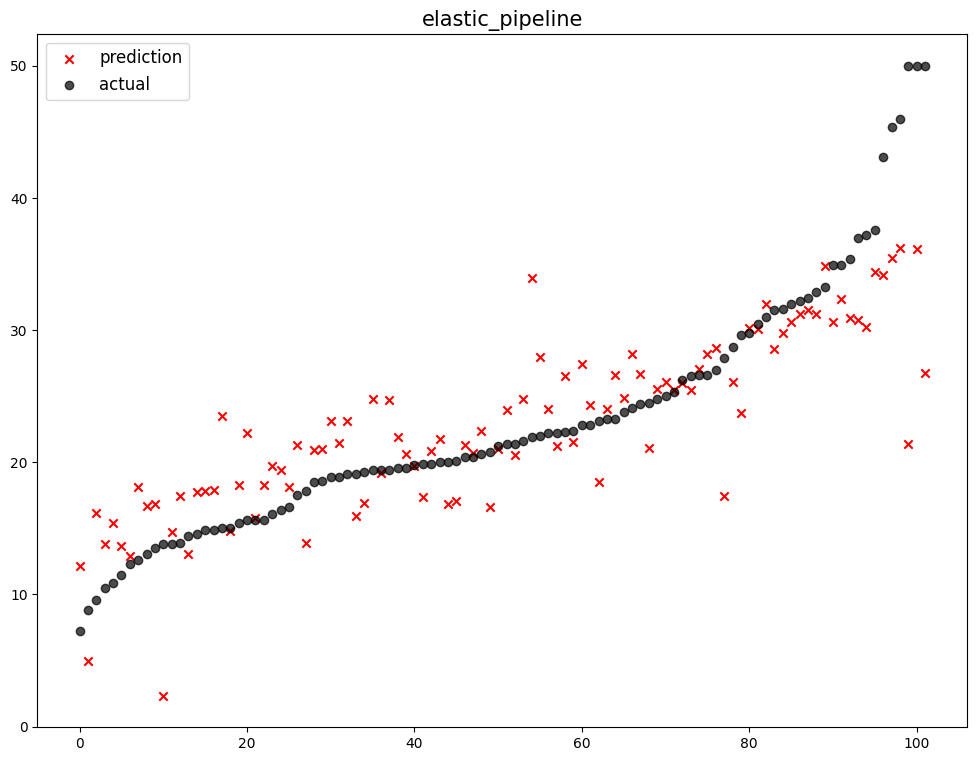

                                 model        mse
0                     elastic_pipeline  31.142802
1                 Ridge(alphas=0.0001)  30.698782
2  ElasticNet(alpha=0.5, l1_ratio=0.8)  29.879814
3  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
4  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
5                          LinearModel  28.192486


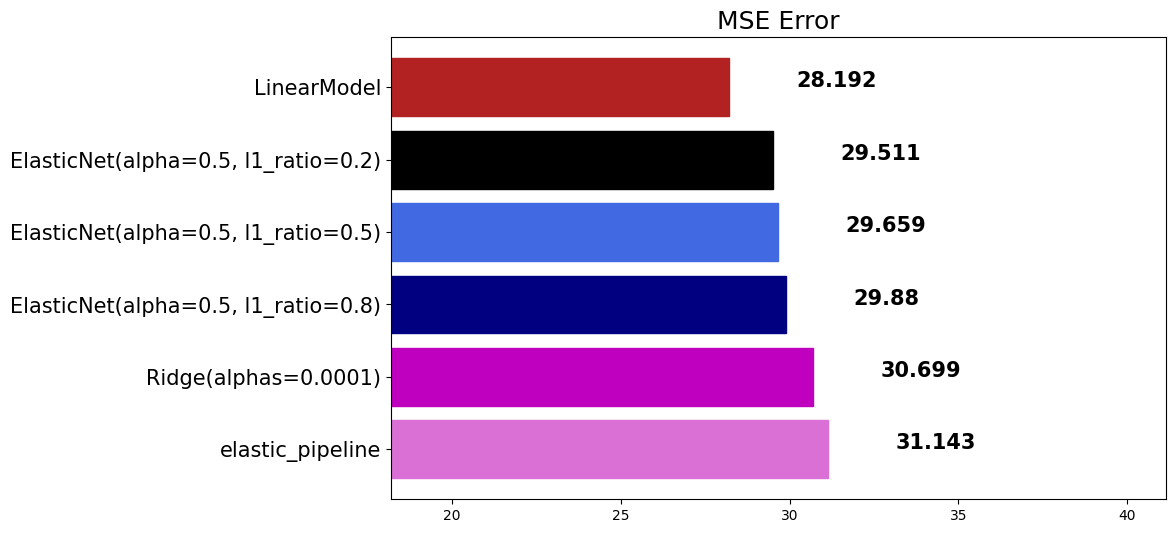

In [ ]:
# 파이프라인 적용
# csv원본데이터 -> 데이터 분할 -> 모델링(훈련용)

# (스텐다드) (엘라스틱)
# 스케일러 + 모델 => 결과

from sklearn.pipeline import make_pipeline
elastic_pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5, l1_ratio=0.2))

elastic_pred = elastic_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('elastic_pipeline', elastic_pred, y_test)

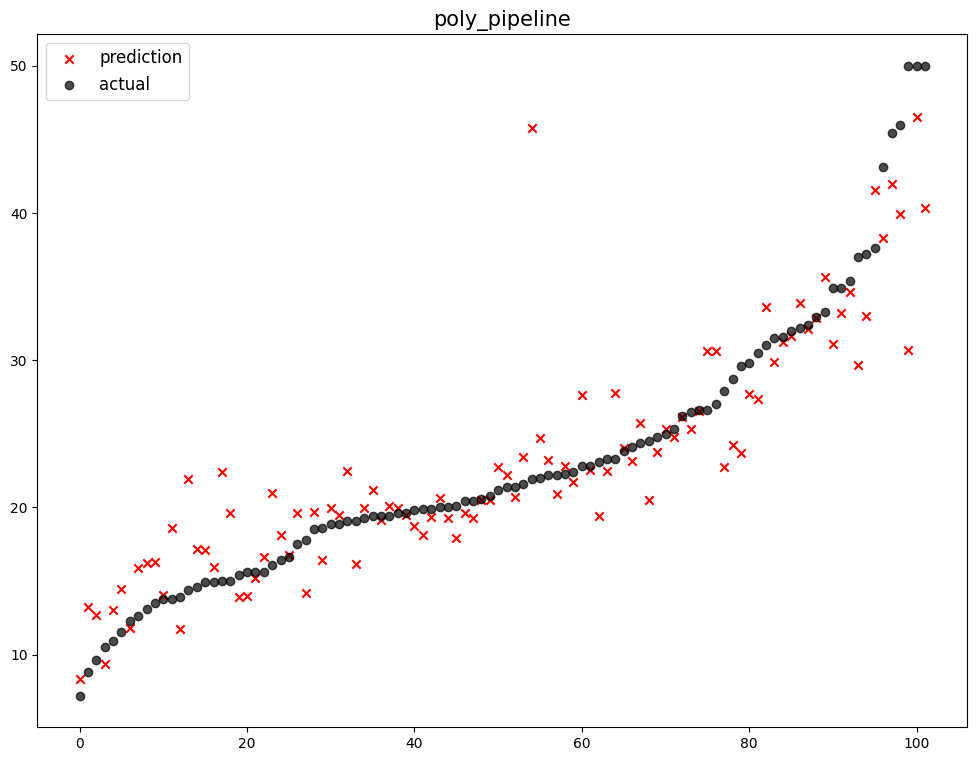

                                 model        mse
0                     elastic_pipeline  31.142802
1                 Ridge(alphas=0.0001)  30.698782
2  ElasticNet(alpha=0.5, l1_ratio=0.8)  29.879814
3  ElasticNet(alpha=0.5, l1_ratio=0.5)  29.658935
4  ElasticNet(alpha=0.5, l1_ratio=0.2)  29.511169
5                          LinearModel  28.192486
6                        poly_pipeline  17.706540


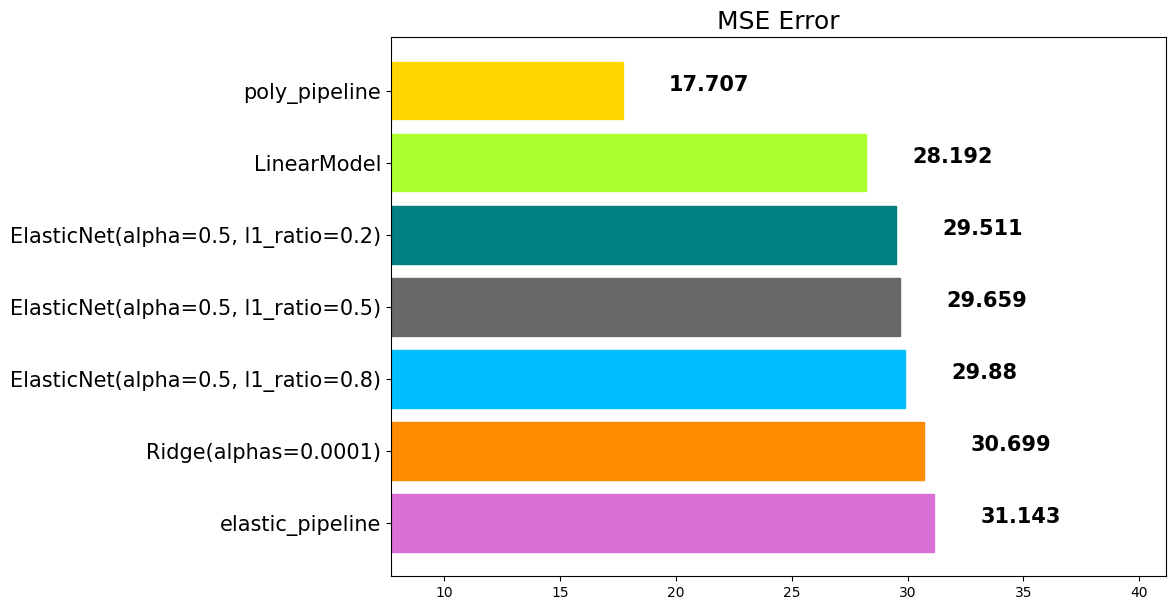

In [ ]:
# 파이프라인에 polynominalFeatures를 추가
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=0.1, l1_ratio=0.2))
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('poly_pipeline', poly_pred, y_test)

In [ ]:
## 이후에는  앙상블 모델을 적용, 성능이 대폭 향상

# GridSearchCV()